# Aplicar los algoritmos en distintos archivos
Aplicar los algoritmos de machine learnign en archivos con distinta preparacion

In [1]:
library(caret)
#library(e1071)
#library(RSNNS)
#library(lattice)
#library(ggplot2)
#library(Rcpp)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
numeric_cleaned = "1_drugs_numeric_cleaned.csv"
smoothed = "2_drugs_smoothed.csv"
discretized = "3_drugs_discretized.csv"

In [3]:
nc_dat = read.csv(numeric_cleaned,  header = TRUE)
sm_dat = read.csv(smoothed,  header = TRUE)
dc_dat = read.csv(discretized,  header = TRUE)
head(nc_dat)

Age,Sex,Blood_Pressure,Cholesterol,Na,K,Drug
23,F,HIGH,HIGH,0.792535,0.031258,drugY
47,M,LOW,HIGH,0.739309,0.056468,drugC
47,M,LOW,HIGH,0.697269,0.068944,drugC
28,F,NORMAL,HIGH,0.563682,0.072289,drugX
61,F,LOW,HIGH,0.559294,0.030998,drugY
22,F,NORMAL,HIGH,0.676901,0.078647,drugX


# Dividiendo los datos
Dividiendo los datos para entrenamiento y pruebas usando caret.

In [106]:
set.seed(300)
nc_indxTrain <- createDataPartition(y = nc_dat$Drug, p = 0.75, list = FALSE)
nc_training <- nc_dat[nc_indxTrain,] # devuelve las filas en nc_indxTrain (similar a un roi)
nc_testing <- nc_dat[-nc_indxTrain,] # devuelve todas las filas que no esten en nc_indxTrain

sm_indxTrain <- createDataPartition(y = sm_dat$Drug, p = 0.75, list = FALSE)
sm_training <- sm_dat[nc_indxTrain,] # devuelve las filas en nc_indxTrain (similar a un roi)
sm_testing <- sm_dat[-nc_indxTrain,] # devuelve todas las filas que no esten en nc_indxTrain

dc_indxTrain <- createDataPartition(y = dc_dat$Drug, p = 0.75, list = FALSE)
dc_training <- dc_dat[dc_indxTrain,] # devuelve las filas en nc_indxTrain (similar a un roi)
dc_testing <- dc_dat[-dc_indxTrain,] # devuelve todas las filas que no esten en nc_indxTrain

table(nc_dat$Drug)
table(nc_training$Drug)
table(nc_testing$Drug)


drugA drugB drugC drugX drugY 
   22    16    16    53    91 


drugA drugB drugC drugX drugY 
   17    12    12    40    69 


drugA drugB drugC drugX drugY 
    5     4     4    13    22 

# Aplicando kNN a "numeric cleaned"
kNN necesita que las datos esten normalizados

In [5]:
cols <- names(nc_training)
nc_trainX <- nc_training[, cols != "Drug"] # selecciona tdoso los datos de entrenamiento exceptuando la columna Drug
nc_preProcValue <- preProcess(x = nc_trainX, method = c("center", "scale"), tuneLength = 20)
nc_preProcValue

Created from 150 samples and 6 variables

Pre-processing:
  - centered (3)
  - ignored (3)
  - scaled (3)


Entrenando el sistema:

In [6]:
set.seed(500)
ctrl <- trainControl(method = "repeatedcv", repeats = 3) # repeatedcv is repeated cross validation
knnFit <- train(Drug ~ ., data = nc_training, method = "knn", trControl = ctrl, preProcess = c("center", "scale"))
knnFit

k-Nearest Neighbors 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 136, 135, 136, 133, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7570343  0.6457641
  7  0.7797958  0.6717484
  9  0.8097759  0.7146852

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

graficando **number of neighbors** vs **accuracy**

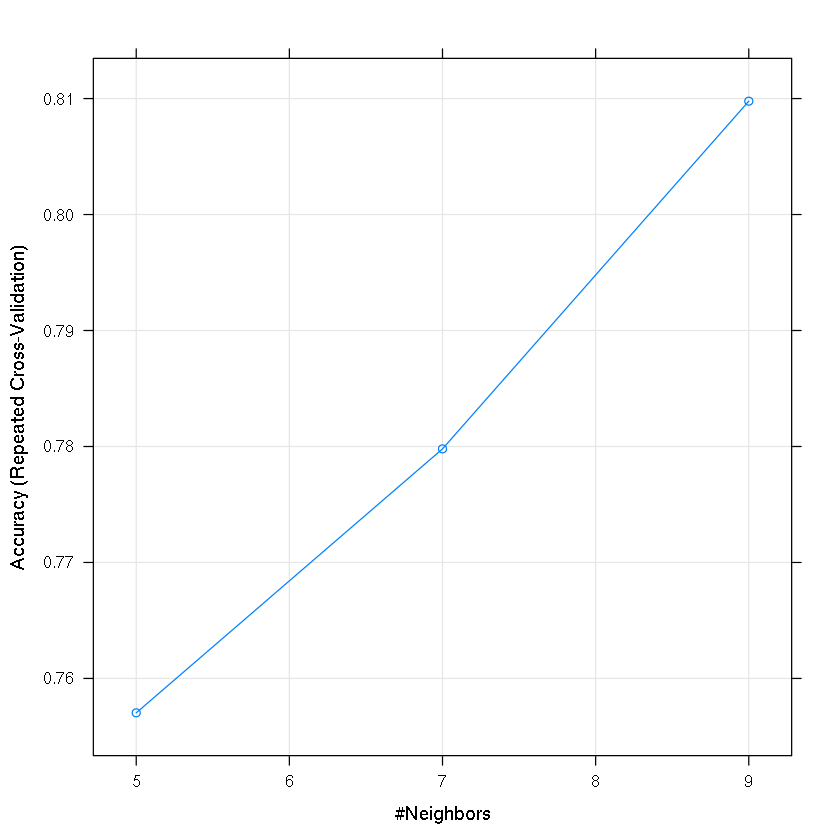

In [7]:
plot(knnFit)

Ahora vamos a probar el modelo con los datos de prueba para mostrar la matriz de confusion asi, como otra informacion estadistica.

In [8]:
knnPredict <- predict(knnFit, newdata = nc_testing)
confusionMatrix(knnPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     4     1     0     1     1
     drugB     0     3     0     1     3
     drugC     0     0     2     0     0
     drugX     0     0     0    11     3
     drugY     1     0     2     0    15

Overall Statistics
                                          
               Accuracy : 0.7292          
                 95% CI : (0.5815, 0.8472)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 0.0001307       
                                          
                  Kappa : 0.623           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.80000      0.75000      0.50000       0.8462
Specificity               0.93023      0.90909      1.00000       0.9143
Pos Pred Value            0.57143      0.42857      1.00000       0.7857
Neg Pred Value        

In [9]:
nc_knn_accuracy <- mean(knnPredict == nc_testing$Drug)
nc_knn_accuracy

[1] 0.7291667

# Aplicando Random Forest a "numeric cleaned"

In [10]:
rfFit <- train(Drug ~ ., data = nc_training, method = "rf", trControl = ctrl, preProcess = c("center", "scale"))
rfFit

Random Forest 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 134, 136, 135, 134, 135, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9131349  0.8698320
  4     0.9152579  0.8747097
  7     0.8998413  0.8517307

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

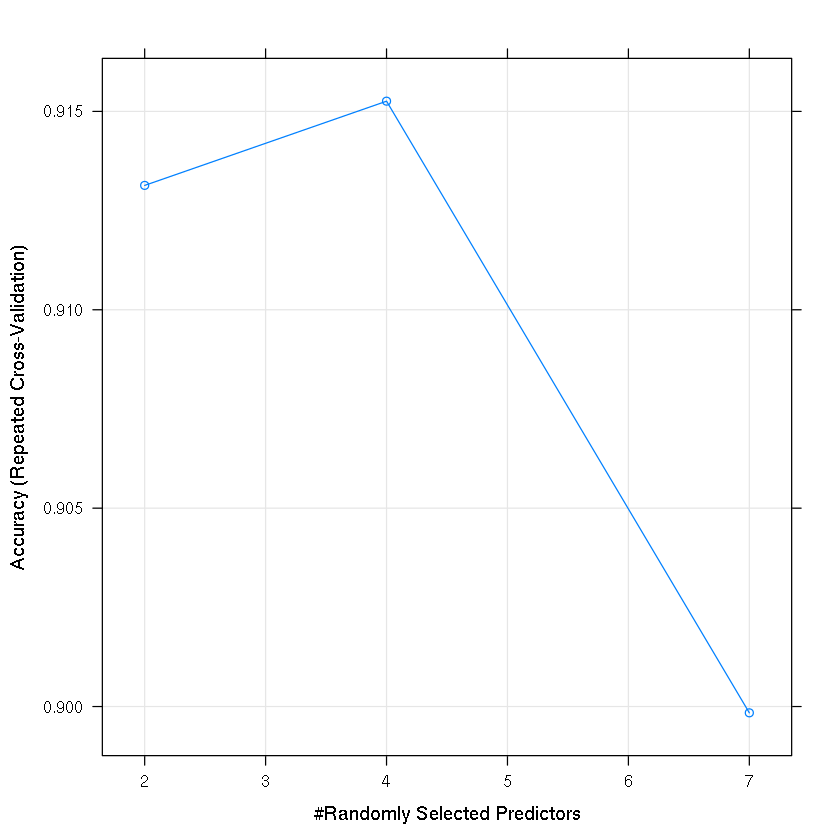

In [11]:
plot(rfFit)

In [12]:
rfPredict <- predict(rfFit, newdata = nc_testing)
confusionMatrix(rfPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     4     0     0     2
     drugC     0     0     4     0     0
     drugX     0     0     0    12     3
     drugY     0     0     0     1    17

Overall Statistics
                                          
               Accuracy : 0.875           
                 95% CI : (0.7475, 0.9527)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 2.061e-09       
                                          
                  Kappa : 0.8252          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       0.9231
Specificity                1.0000      0.95455      1.00000       0.9143
Pos Pred Value             1.0000      0.66667      1.00000       0.8000
Neg Pred Value        

In [13]:
nc_rf_accuracy <- mean(rfPredict == nc_testing$Drug)
nc_rf_accuracy

[1] 0.875

# Aplicando Naive Bayes a "numeric cleaned"

Normalizando datos de entrenamiento

In [14]:
# cnormalizar los datos en el conjuto de entrenamiento
preprocessParams <- preProcess(nc_training, method=c("range"))
nc_training_norm <- predict(preprocessParams, nc_training)
head(nc_training_norm)

,Age,Sex,Blood_Pressure,Cholesterol,Na,K,Drug
1,0.1355932,F,HIGH,HIGH,0.73850872,0.1877280,drugY
3,0.5423729,M,LOW,HIGH,0.49786934,0.8184983,drugC
4,0.2203390,F,NORMAL,HIGH,0.16043214,0.8744853,drugX
5,0.7796610,F,LOW,HIGH,0.14934817,0.1833763,drugY
6,0.1186441,F,NORMAL,HIGH,0.44642032,0.9809025,drugX
10,0.4745763,M,LOW,NORMAL,0.06550607,0.1192046,drugY


In [15]:
nbFit <- train(Drug ~ ., data = nc_training, method = "nb", trControl = ctrl, preProcess = c("range"))
#bayes <- train(Drug ~ ., data = data.train,  method = "nb", trControl=trctrl, tuneLength = 10)
nbFit

Warning message:
“model fit failed for Fold01.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold02.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold03.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold04.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances f

Naive Bayes 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 136, 136, 134, 135, 135, 136, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE            NaN        NaN
   TRUE      0.6607937  0.4635181

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

Probamos el modelo

In [16]:
nbPredict <- predict(nbFit, newdata = nc_testing)
confusionMatrix(nbPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     0     0     0     0     0
     drugB     0     0     0     0     0
     drugC     0     0     0     0     0
     drugX     4     4     4    12     4
     drugY     1     0     0     1    18

Overall Statistics
                                          
               Accuracy : 0.625           
                 95% CI : (0.4735, 0.7605)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 0.01494         
                                          
                  Kappa : 0.424           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                0.0000      0.00000      0.00000       0.9231
Specificity                1.0000      1.00000      1.00000       0.5429
Pos Pred Value                NaN          NaN          NaN       0.4286
Neg Pred Value        

In [17]:
nc_nb_accuracy <- mean(nbPredict == nc_testing$Drug)
nc_nb_accuracy

[1] 0.625

# Aplicando SVM a "numeric cleaned"

Entrenamos el modelo

In [18]:
svmlinFit <- train(Drug ~ ., data = nc_training, method = "svmLinear", trControl = ctrl, preProcess = c("range"))
svmlinFit

Support Vector Machines with Linear Kernel 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 135, 136, 134, ... 
Resampling results:

  Accuracy   Kappa   
  0.9515943  0.930929

Tuning parameter 'C' was held constant at a value of 1

Probamos el modelo

In [19]:
svmlinPredict <- predict(svmlinFit, newdata = nc_testing)
confusionMatrix(svmlinPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     4     0     0     2
     drugC     0     0     4     0     0
     drugX     0     0     0    12     0
     drugY     0     0     0     1    20

Overall Statistics
                                         
               Accuracy : 0.9375         
                 95% CI : (0.828, 0.9869)
    No Information Rate : 0.4583         
    P-Value [Acc > NIR] : 1.646e-12      
                                         
                  Kappa : 0.9112         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       0.9231
Specificity                1.0000      0.95455      1.00000       1.0000
Pos Pred Value             1.0000      0.66667      1.00000       1.0000
Neg Pred Value             1.0

In [20]:
nc_svmlin_accuracy <- mean(svmlinPredict == nc_testing$Drug)
nc_svmlin_accuracy

[1] 0.9375

# Aplicando red neuronal a "numeric cleaned"

Entrenamos el multi-layer perceptron

In [33]:
mlpFit <- train(Drug ~ ., data = nc_training, method = "mlp", trControl = ctrl, preProcess = c("range"))
mlpFit

Multi-Layer Perceptron 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 134, 136, 133, 135, 135, ... 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
  1     0.7010344  0.5243466
  3     0.8740104  0.8147881
  5     0.9026448  0.8575253

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 5.

Probamos el modelo

In [34]:
mlpPredict <- predict(mlpFit, newdata = nc_testing)
confusionMatrix(mlpPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     4     1     0     0     0
     drugB     1     2     0     0     0
     drugC     0     0     4     0     0
     drugX     0     0     0    13     0
     drugY     0     1     0     0    22

Overall Statistics
                                         
               Accuracy : 0.9375         
                 95% CI : (0.828, 0.9869)
    No Information Rate : 0.4583         
    P-Value [Acc > NIR] : 1.646e-12      
                                         
                  Kappa : 0.9086         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.80000      0.50000      1.00000       1.0000
Specificity               0.97674      0.97727      1.00000       1.0000
Pos Pred Value            0.80000      0.66667      1.00000       1.0000
Neg Pred Value            0.97

In [35]:
nc_mlp_accuracy <- mean(mlpPredict == nc_testing$Drug)
nc_mlp_accuracy

[1] 0.9375

# Aplicando regresion logistica a "numeric cleaned"

Aplicamos multinomial linear regression para poder tener mas de una clase

In [32]:
multinomFit <- train(Drug ~ ., data = nc_training, method = "multinom", trControl = ctrl, preProcess = c("range"))
multinomFit

# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 26.682838
iter  20 value 0.270314
iter  30 value 0.000672
final  value 0.000086 
converged
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 65.070599
iter  20 value 60.915912
final  value 60.914446 
converged
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 26.767014
iter  20 value 2.588842
iter  30 value 2.423095
iter  40 value 2.319908
iter  50 value 2.271329
iter  60 value 2.206909
iter  70 value 2.173249
iter  80 value 2.158434
iter  90 value 2.149709
iter 100 value 2.140991
final  value 2.140991 
stopped after 100 iterations
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 23.447263
iter  20 value 0.288009
iter  30 value 0.000797
final  value 0.000056 
converged
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 64.795030
iter  20 value 59.875202
final  value 59.873926 
converged
# weights:  45 (32 variable)
initial  value 217

Penalized Multinomial Regression 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 134, 135, 136, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.9416865  0.9157149
  1e-04  0.9504563  0.9288258
  1e-01  0.9206151  0.8825428

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 1e-04.

Probamos el modelo

In [37]:
multinomPredict <- predict(multinomFit, newdata = nc_testing)
confusionMatrix(multinomPredict, nc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     4     0     0     1
     drugC     0     0     4     0     0
     drugX     0     0     0    13     0
     drugY     0     0     0     0    21

Overall Statistics
                                          
               Accuracy : 0.9792          
                 95% CI : (0.8893, 0.9995)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 3.148e-15       
                                          
                  Kappa : 0.9702          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       1.0000
Specificity                1.0000      0.97727      1.00000       1.0000
Pos Pred Value             1.0000      0.80000      1.00000       1.0000
Neg Pred Value        

In [39]:
nc_multinom_accuracy <- mean(multinomPredict == nc_testing$Drug)
nc_multinom_accuracy

[1] 0.9791667

# Resumen de "accuracy" en "numeric cleaned"

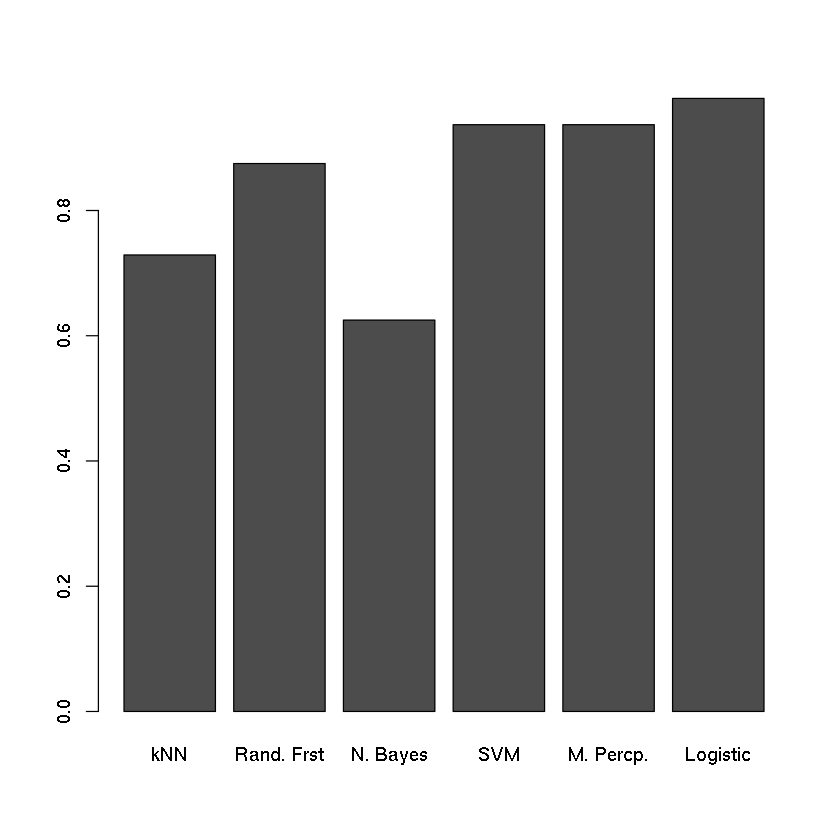

In [69]:
foo <- matrix(c(0.729, 0.875, 0.625, 0.937, 0.937, 0.979), nrow=1, ncol=6)
colnames(foo) <- c("kNN", "Rand. Frst", "N. Bayes", "SVM", "M. Percp.", "Logistic")
barplot(foo)

# Aplicando kNN a "smoothed"

kNN necesita que las datos esten normalizados

In [71]:
cols <- names(sm_training)
sm_trainX <- sm_training[, cols != "Drug"] # selecciona tdoso los datos de entrenamiento exceptuando la columna Drug
sm_preProcValue <- preProcess(x = sm_trainX, method = c("center", "scale"), tuneLength = 20)
sm_preProcValue

Created from 150 samples and 6 variables

Pre-processing:
  - centered (3)
  - ignored (3)
  - scaled (3)


Entrenando el sistema:

In [72]:
set.seed(500)
ctrl <- trainControl(method = "repeatedcv", repeats = 3) # repeatedcv is repeated cross validation
knnFit <- train(Drug ~ ., data = sm_training, method = "knn", trControl = ctrl, preProcess = c("center", "scale"))
knnFit

k-Nearest Neighbors 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 136, 135, 136, 133, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7570343  0.6457641
  7  0.7797958  0.6717484
  9  0.8097759  0.7146852

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [73]:
knnPredict <- predict(knnFit, newdata = sm_testing)
confusionMatrix(knnPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     1     0     0     1
     drugB     0     3     0     1     3
     drugC     0     0    14     0     0
     drugX     0     0     0    12     2
     drugY     0     0     6     0    16

Overall Statistics
                                          
               Accuracy : 0.7812          
                 95% CI : (0.6603, 0.8749)
    No Information Rate : 0.3438          
    P-Value [Acc > NIR] : 9.941e-13       
                                          
                  Kappa : 0.7098          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               1.00000      0.75000       0.7000       0.9231
Specificity               0.96610      0.93333       1.0000       0.9608
Pos Pred Value            0.71429      0.42857       1.0000       0.8571
Neg Pred Value        

In [75]:
sm_knn_accuracy <- mean(knnPredict == sm_testing$Drug)
sm_knn_accuracy

[1] 0.78125

# Aplicando Random Forest a "smoothed"

In [76]:
rfFit <- train(Drug ~ ., data = sm_training, method = "rf", trControl = ctrl, preProcess = c("center", "scale"))
rfFit

Random Forest 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 136, 134, 135, 135, 136, 134, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9030907  0.8557119
  4     0.9185470  0.8802630
  7     0.8978281  0.8487205

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

In [77]:
rfPredict <- predict(rfFit, newdata = sm_testing)
confusionMatrix(rfPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     4     0     0     2
     drugC     0     0    20     0     0
     drugX     0     0     0    12     3
     drugY     0     0     0     1    17

Overall Statistics
                                         
               Accuracy : 0.9062         
                 95% CI : (0.807, 0.9648)
    No Information Rate : 0.3438         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8743         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               1.00000      1.00000       1.0000       0.9231
Specificity               1.00000      0.96667       1.0000       0.9412
Pos Pred Value            1.00000      0.66667       1.0000       0.8000
Neg Pred Value            1.00

In [78]:
sm_rf_accuracy <- mean(rfPredict == sm_testing$Drug)
sm_rf_accuracy

[1] 0.90625

# Aplicando Naive Bayes a "smoothed"

In [81]:
nbFit <- train(Drug ~ ., data = sm_training, method = "nb", trControl = ctrl, preProcess = c("range"))
#bayes <- train(Drug ~ ., data = data.train,  method = "nb", trControl=trctrl, tuneLength = 10)
nbFit

Warning message:
“model fit failed for Fold01.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold02.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold03.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL
”Warning message:
“model fit failed for Fold04.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances f

Naive Bayes 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 136, 134, 135, 134, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE            NaN        NaN
   TRUE      0.6599813  0.4650917

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

In [82]:
nbPredict <- predict(nbFit, newdata = sm_testing)
confusionMatrix(nbPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     0     0     0     0     0
     drugB     0     0     0     0     0
     drugC     0     0     0     0     0
     drugX     4     4    19    12     4
     drugY     1     0     1     1    18

Overall Statistics
                                          
               Accuracy : 0.4688          
                 95% CI : (0.3428, 0.5977)
    No Information Rate : 0.3438          
    P-Value [Acc > NIR] : 0.02598         
                                          
                  Kappa : 0.2924          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.00000       0.0000       0.0000       0.9231
Specificity               1.00000       1.0000       1.0000       0.3922
Pos Pred Value                NaN          NaN          NaN       0.2791
Neg Pred Value        

In [91]:
sm_nb_accuracy <- mean(nbPredict == sm_testing$Drug)
sm_nb_accuracy

[1] 0.46875

# Aplicando SVM a "smoothed"

In [88]:
svmlinFit <- train(Drug ~ ., data = sm_training, method = "svmLinear", trControl = ctrl, preProcess = c("range"))
svmlinFit

Support Vector Machines with Linear Kernel 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 134, 135, 136, 135, 136, 134, ... 
Resampling results:

  Accuracy   Kappa    
  0.9481944  0.9246565

Tuning parameter 'C' was held constant at a value of 1

In [90]:
svmlinPredict <- predict(svmlinFit, newdata = sm_testing)
confusionMatrix(svmlinPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     4     0     0     2
     drugC     0     0    20     0     0
     drugX     0     0     0    12     0
     drugY     0     0     0     1    20

Overall Statistics
                                          
               Accuracy : 0.9531          
                 95% CI : (0.8691, 0.9902)
    No Information Rate : 0.3438          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9366          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               1.00000      1.00000       1.0000       0.9231
Specificity               1.00000      0.96667       1.0000       1.0000
Pos Pred Value            1.00000      0.66667       1.0000       1.0000
Neg Pred Value        

In [94]:
sm_svmlin_accuracy <- mean(svmlinPredict == sm_testing$Drug)
sm_svmlin_accuracy

[1] 0.953125

# Aplicando red neuronal a "smoothed"

In [96]:
mlpFit <- train(Drug ~ ., data = sm_training, method = "mlp", trControl = ctrl, preProcess = c("range"))
mlpFit

Multi-Layer Perceptron 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 136, 135, 135, 136, 135, ... 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
  1     0.7032738  0.5268810
  3     0.8474405  0.7746002
  5     0.9025595  0.8574439

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 5.

In [98]:
mlpPredict <- predict(mlpFit, newdata = sm_testing)
confusionMatrix(mlpPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     3     0     0     0
     drugB     0     1     0     0     0
     drugC     0     0    20     0     0
     drugX     0     0     0    13     0
     drugY     0     0     0     0    22

Overall Statistics
                                          
               Accuracy : 0.9531          
                 95% CI : (0.8691, 0.9902)
    No Information Rate : 0.3438          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.936           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               1.00000      0.25000       1.0000       1.0000
Specificity               0.94915      1.00000       1.0000       1.0000
Pos Pred Value            0.62500      1.00000       1.0000       1.0000
Neg Pred Value        

In [100]:
sm_mlp_accuracy <- mean(mlpPredict == sm_testing$Drug)
sm_mlp_accuracy

[1] 0.953125

# Aplicando regresion logistica a "smoothed"

In [101]:
multinomFit <- train(Drug ~ ., data = sm_training, method = "multinom", trControl = ctrl, preProcess = c("range"))
multinomFit

# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 25.658217
iter  20 value 0.391599
iter  30 value 0.000889
final  value 0.000056 
converged
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 65.257027
iter  20 value 60.375693
final  value 60.374298 
converged
# weights:  45 (32 variable)
initial  value 217.274118 
iter  10 value 25.757552
iter  20 value 2.513924
iter  30 value 2.333019
iter  40 value 2.238833
iter  50 value 2.197563
iter  60 value 2.163636
iter  70 value 2.132005
iter  80 value 2.117876
iter  90 value 2.109988
iter 100 value 2.098288
final  value 2.098288 
stopped after 100 iterations
# weights:  45 (32 variable)
initial  value 215.664680 
iter  10 value 26.309532
iter  20 value 0.408213
iter  30 value 0.000746
final  value 0.000098 
converged
# weights:  45 (32 variable)
initial  value 215.664680 
iter  10 value 68.496893
iter  20 value 60.559513
final  value 60.557303 
converged
# weights:  45 (32 variable)
initial  value 215

Penalized Multinomial Regression 

150 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 134, 136, 134, 135, 135, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.9504960  0.9287556
  1e-04  0.9475397  0.9243440
  1e-01  0.9274756  0.8935082

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.

In [102]:
multinomPredict <- predict(multinomFit, newdata = sm_testing)
confusionMatrix(multinomPredict, sm_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     5     0     0     0     0
     drugB     0     3     0     0     0
     drugC     0     0    20     0     0
     drugX     0     0     0    13     1
     drugY     0     1     0     0    21

Overall Statistics
                                          
               Accuracy : 0.9688          
                 95% CI : (0.8916, 0.9962)
    No Information Rate : 0.3438          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9572          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               1.00000      0.75000       1.0000       1.0000
Specificity               1.00000      1.00000       1.0000       0.9804
Pos Pred Value            1.00000      1.00000       1.0000       0.9286
Neg Pred Value        

In [103]:
sm_multinom_accuracy <- mean(multinomPredict == sm_testing$Drug)
sm_multinom_accuracy

[1] 0.96875

# Resumen de "accuracy" en "smoothed"

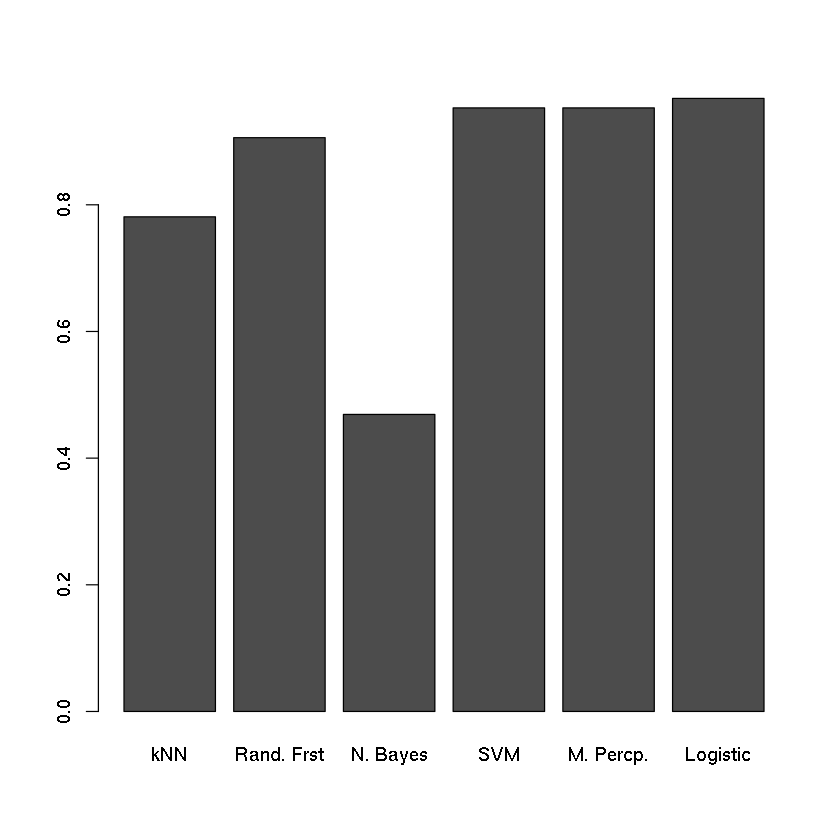

In [107]:
foo <- matrix(c(0.781, 0.906, 0.469, 0.953, 0.953, 0.968), nrow=1, ncol=6)
colnames(foo) <- c("kNN", "Rand. Frst", "N. Bayes", "SVM", "M. Percp.", "Logistic")
barplot(foo)

# Aplicando kNN a "discretized"

kNN necesita que las datos esten normalizados

In [110]:
cols <- names(dc_training)
dc_trainX <- dc_training[, cols != "Drug"] # selecciona tdoso los datos de entrenamiento exceptuando la columna Drug
dc_preProcValue <- preProcess(x = dc_trainX, method = c("center", "scale"), tuneLength = 20)
dc_preProcValue

Created from 162 samples and 6 variables

Pre-processing:
  - centered (1)
  - ignored (5)
  - scaled (1)


In [111]:
set.seed(500)
ctrl <- trainControl(method = "repeatedcv", repeats = 3) # repeatedcv is repeated cross validation
knnFit <- train(Drug ~ ., data = dc_training, method = "knn", trControl = ctrl, preProcess = c("center", "scale"))
knnFit

k-Nearest Neighbors 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (15), scaled (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 146, 146, 145, 146, 148, 144, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.6963640  0.5679659
  7  0.6777965  0.5325485
  9  0.6941643  0.5548094

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

In [113]:
knnPredict <- predict(knnFit, newdata = dc_testing)
confusionMatrix(knnPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     0     1     0     1     0
     drugB     1     1     0     1     0
     drugC     0     0     4     1     1
     drugX     2     1     2     4     1
     drugY     2     1     2     6    20

Overall Statistics
                                          
               Accuracy : 0.5577          
                 95% CI : (0.4133, 0.6953)
    No Information Rate : 0.4231          
    P-Value [Acc > NIR] : 0.03478         
                                          
                  Kappa : 0.3436          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.00000      0.25000      0.50000      0.30769
Specificity               0.95745      0.95833      0.95455      0.84615
Pos Pred Value            0.00000      0.33333      0.66667      0.40000
Neg Pred Value        

In [116]:
dc_knn_accuracy <- mean(knnPredict == dc_testing$Drug)
dc_knn_accuracy

[1] 0.5576923

# Aplicando Random Forest a "discretized"

In [117]:
rfFit <- train(Drug ~ ., data = dc_training, method = "rf", trControl = ctrl, preProcess = c("center", "scale"))
rfFit

Random Forest 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: centered (15), scaled (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 145, 146, 146, 146, 145, 148, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7558263  0.6289321
   8    0.8465079  0.7832461
  15    0.8544374  0.7954793

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.

In [118]:
rfPredict <- predict(rfFit, newdata = dc_testing)
confusionMatrix(rfPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     2     0     0     0     0
     drugB     0     4     0     0     0
     drugC     0     0     8     0     1
     drugX     1     0     0    12     1
     drugY     2     0     0     1    20

Overall Statistics
                                          
               Accuracy : 0.8846          
                 95% CI : (0.7656, 0.9565)
    No Information Rate : 0.4231          
    P-Value [Acc > NIR] : 5.403e-12       
                                          
                  Kappa : 0.8373          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.40000      1.00000       1.0000       0.9231
Specificity               1.00000      1.00000       0.9773       0.9487
Pos Pred Value            1.00000      1.00000       0.8889       0.8571
Neg Pred Value        

In [119]:
dc_rf_accuracy <- mean(rfPredict == dc_testing$Drug)
dc_rf_accuracy

[1] 0.8846154

# Aplicando Naive Bayes a "discretized"

In [121]:
nbFit <- train(Drug ~ ., data = dc_training, method = "nb", trControl = ctrl, preProcess = c("range"))
#bayes <- train(Drug ~ ., data = data.train,  method = "nb", trControl=trctrl, tuneLength = 10)
nbFit

Warning message:
“model fit failed for Fold01.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL, Na....0.166667.0.333333...., Na....0.666667.0.833333...., K....0.166667.0.333333...., K....0.666667.0.833333...., K....0.833333.inf....
”Warning message:
“model fit failed for Fold02.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: Blood_PressureLOW, Blood_PressureNORMAL, CholesterolNORMAL, Na....0.166667.0.333333...., K....0.166667.0.333333...., K....0.666667.0.833333...., K....0.833333.inf....
”Warning message:
“model fit failed for Fold03.Rep1: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in vari

Naive Bayes 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 145, 146, 146, 146, 145, 146, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE            NaN        NaN
   TRUE      0.5692239  0.3130084

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

In [122]:
nbPredict <- predict(nbFit, newdata = dc_testing)
confusionMatrix(nbPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     0     0     0     0     0
     drugB     0     0     0     0     0
     drugC     0     0     5     0     0
     drugX     2     1     1     7     0
     drugY     3     3     2     6    22

Overall Statistics
                                          
               Accuracy : 0.6538          
                 95% CI : (0.5091, 0.7803)
    No Information Rate : 0.4231          
    P-Value [Acc > NIR] : 0.0006654       
                                          
                  Kappa : 0.4586          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.00000      0.00000      0.62500       0.5385
Specificity               1.00000      1.00000      1.00000       0.8974
Pos Pred Value                NaN          NaN      1.00000       0.6364
Neg Pred Value        

In [123]:
dc_nb_accuracy <- mean(nbPredict == dc_testing$Drug)
dc_nb_accuracy

[1] 0.6538462

# Aplicando SVM a "discretized"

In [124]:
svmlinFit <- train(Drug ~ ., data = dc_training, method = "svmLinear", trControl = ctrl, preProcess = c("range"))
svmlinFit

Support Vector Machines with Linear Kernel 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 147, 145, 147, 146, 145, 145, ... 
Resampling results:

  Accuracy   Kappa    
  0.8795044  0.8317248

Tuning parameter 'C' was held constant at a value of 1

In [125]:
svmlinPredict <- predict(svmlinFit, newdata = dc_testing)
confusionMatrix(svmlinPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     4     0     0     0     0
     drugB     0     3     0     0     0
     drugC     0     0     8     0     2
     drugX     0     0     0    12     0
     drugY     1     1     0     1    20

Overall Statistics
                                         
               Accuracy : 0.9038         
                 95% CI : (0.7897, 0.968)
    No Information Rate : 0.4231         
    P-Value [Acc > NIR] : 4.966e-13      
                                         
                  Kappa : 0.8653         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.80000      0.75000       1.0000       0.9231
Specificity               1.00000      1.00000       0.9545       1.0000
Pos Pred Value            1.00000      1.00000       0.8000       1.0000
Neg Pred Value            0.97

In [126]:
dc_svmlin_accuracy <- mean(svmlinPredict == dc_testing$Drug)
dc_svmlin_accuracy

[1] 0.9038462

# Aplicando red neuronal a "discretized"

In [129]:
mlpFit <- train(Drug ~ ., data = dc_training, method = "mlp", trControl = ctrl, preProcess = c("range"))
mlpFit

Multi-Layer Perceptron 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 146, 147, 146, 145, 147, 146, ... 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
  1     0.6449899  0.4649465
  3     0.8823642  0.8340140
  5     0.8828143  0.8347980

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 5.

In [130]:
mlpPredict <- predict(mlpFit, newdata = dc_testing)
confusionMatrix(mlpPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     4     1     0     0     0
     drugB     1     2     0     0     0
     drugC     0     0     8     0     2
     drugX     0     0     0    12     0
     drugY     0     1     0     1    20

Overall Statistics
                                          
               Accuracy : 0.8846          
                 95% CI : (0.7656, 0.9565)
    No Information Rate : 0.4231          
    P-Value [Acc > NIR] : 5.403e-12       
                                          
                  Kappa : 0.8398          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.80000      0.50000       1.0000       0.9231
Specificity               0.97872      0.97917       0.9545       1.0000
Pos Pred Value            0.80000      0.66667       0.8000       1.0000
Neg Pred Value        

In [131]:
dc_mlp_accuracy <- mean(mlpPredict == dc_testing$Drug)
dc_mlp_accuracy

[1] 0.8846154

# Aplicando regresion logistica a "discretized"

In [133]:
multinomFit <- train(Drug ~ ., data = dc_training, method = "multinom", trControl = ctrl, preProcess = c("range"))
multinomFit

# weights:  85 (64 variable)
initial  value 234.977935 
iter  10 value 20.699243
iter  20 value 0.204021
iter  30 value 0.001053
final  value 0.000072 
converged
# weights:  85 (64 variable)
initial  value 234.977935 
iter  10 value 61.090372
iter  20 value 59.723102
iter  30 value 59.703781
final  value 59.703779 
converged
# weights:  85 (64 variable)
initial  value 234.977935 
iter  10 value 20.804284
iter  20 value 1.406155
iter  30 value 1.259357
iter  40 value 1.213647
iter  50 value 1.182295
iter  60 value 1.168697
iter  70 value 1.156826
iter  80 value 1.151238
iter  90 value 1.146716
iter 100 value 1.144972
final  value 1.144972 
stopped after 100 iterations
# weights:  85 (64 variable)
initial  value 234.977935 
iter  10 value 19.757632
iter  20 value 0.460600
iter  30 value 0.002285
final  value 0.000051 
converged
# weights:  85 (64 variable)
initial  value 234.977935 
iter  10 value 59.496283
iter  20 value 58.353935
iter  30 value 58.342581
final  value 58.342580 
converg

Penalized Multinomial Regression 

162 samples
  6 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

Pre-processing: re-scaling to [0, 1] (15) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 146, 146, 145, 146, 147, 145, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.8860049  0.8430152
  1e-04  0.9239869  0.8941879
  1e-01  0.8642892  0.8080702

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 1e-04.

In [134]:
multinomPredict <- predict(multinomFit, newdata = dc_testing)
confusionMatrix(multinomPredict, dc_testing$Drug)

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     4     0     0     0     0
     drugB     1     4     0     0     0
     drugC     0     0     8     0     3
     drugX     0     0     0    12     0
     drugY     0     0     0     1    19

Overall Statistics
                                         
               Accuracy : 0.9038         
                 95% CI : (0.7897, 0.968)
    No Information Rate : 0.4231         
    P-Value [Acc > NIR] : 4.966e-13      
                                         
                  Kappa : 0.8687         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity               0.80000      1.00000       1.0000       0.9231
Specificity               1.00000      0.97917       0.9318       1.0000
Pos Pred Value            1.00000      0.80000       0.7273       1.0000
Neg Pred Value            0.97

In [135]:
dc_multinom_accuracy <- mean(multinomPredict == dc_testing$Drug)
dc_multinom_accuracy

[1] 0.9038462

# Resumen de "accuracy" en "discretized"

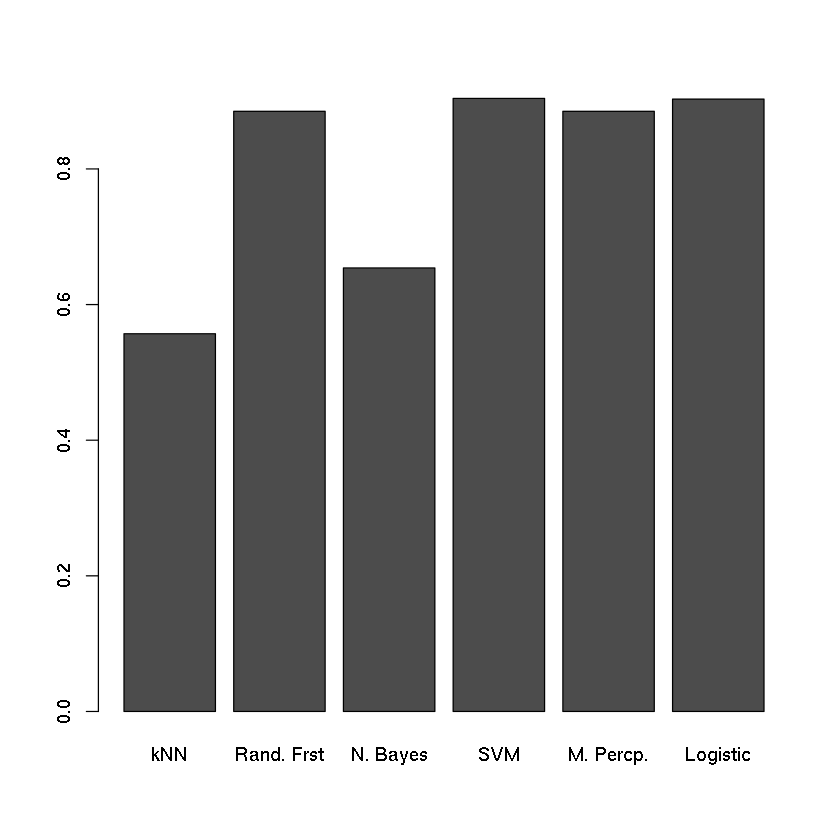

In [143]:
foo <- matrix(c(0.557, 0.885, 0.654, 0.904, 0.885, 0.903), nrow=1, ncol=6)
colnames(foo) <- c("kNN", "Rand. Frst", "N. Bayes", "SVM", "M. Percp.", "Logistic")
barplot(foo)

# Conclusiones

## Promedio de efectividad en cada conjunto de datos

Se calcula el promedio de efectividad que tuvo el conjunto de datos en distintas configuraciones de preprocesado. donde el procesado que se aplicò a cada conjunto de datos es el siguiente:

**cleaned**: se removieron valores atipicos

**smoothed:** *cleaned* + suavizado de datos

**discretized:** *cleaned* + *smoothed* + se discretizaron los datos numericos

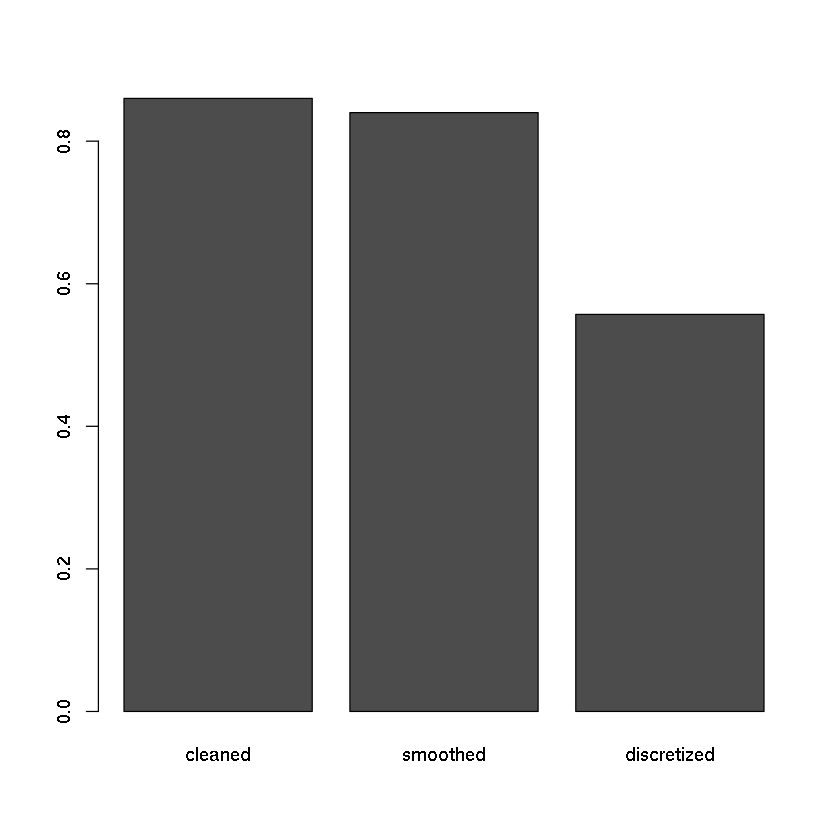

In [141]:
foo <- matrix(c(0.86, 0.84, 0.557), nrow=1, ncol=3)
colnames(foo) <- c("cleaned", "smoothed", "discretized")
barplot(foo)

## Mejor configuracion

Se comprobò experimentalmente que la mejor configuracion de preprocesado conciste unicamente en eliminar registros atipicos, asi mismo el algoritmo que arroja mayor precision pertenece al conjunto de datos mencionado anteriormente, siendo este el de regresion logistica con una efectividad del 97%.

Tambien es interesante notar la poca efectividad de los metodos bayesianos en todas las configuraciones, y su relativa mejora de precision cuando los datos han sido limpiados, suavizados y discretizados. Aun asi los metodos bayesianos no logran una efectividad mayor al 65% en ninguna configuraciòn.

## Precision promedio de cada metodo

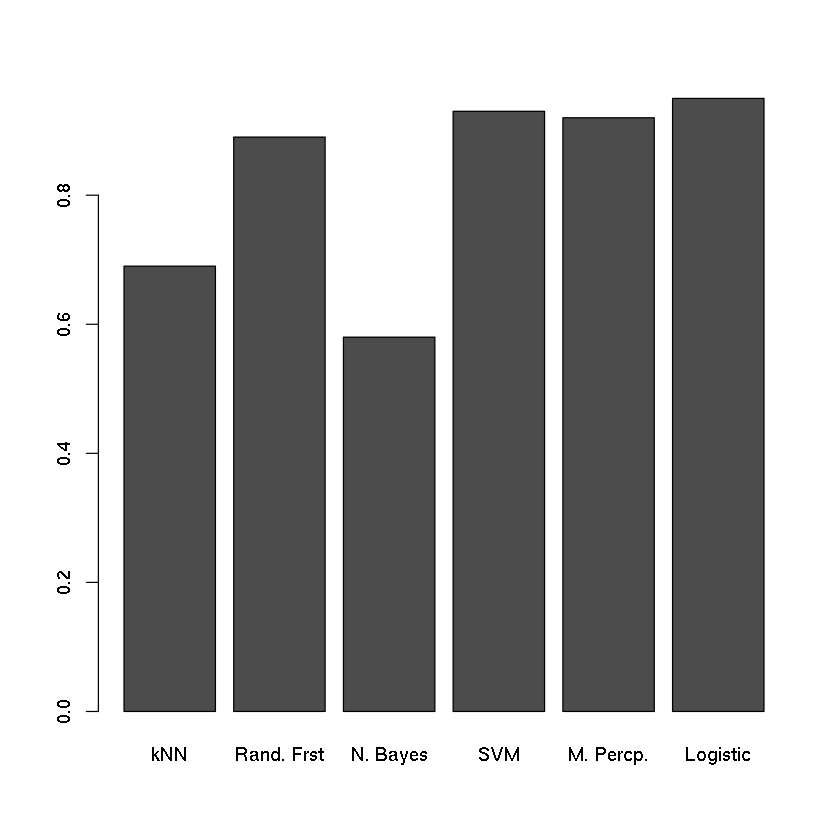

In [149]:
foo <- matrix(c(0.69, 0.89, 0.58, 0.93, 0.92, 0.95), nrow=1, ncol=6)
colnames(foo) <- c("kNN", "Rand. Frst", "N. Bayes", "SVM", "M. Percp.", "Logistic")
barplot(foo)

De esta manera se concluye que los mejores resultados los arrojò la regresion logistica, seguida de cerca por la SVM y las redes neuronales.